Lab 2 | Measurement of the Speed of Light <br>
Name: Joshua Iascau<br>
Date:10/20/23


In [983]:
import math
import numpy as np
import matplotlib.pyplot as plt

### 2.4 Ping Times <br>

#### 2.4.1


In [984]:
#Communication Fiber Calculation
c = 299792458 #ms-1
distance1 = 1000 #km
kmconversion = 1000/1 #m/km
def time(distance):
    times = (distance*kmconversion)/c
    return times

#print result
print(f"Time: {time(distance1)} seconds")


Time: 0.0033356409519815205 seconds


Time: 3.0*(10**-3) seconds

Question: Write down a few comments about things you may not know which could impact
your estimate.<br><br>
-> The refractive index of glass can vary depending on the type of glass used. (2) The speed of light in glass can also be affected by the temperature and pressure of the glass. This is a systematic error.


In [985]:
#Timing resolution needed with 1m and 20m cable
distance2 = 1
distance3 = 20
time2 = time(distance2)
time3 = time(distance3)

print(f"Timing Resolution for 1m: {time2} s")
print(f"Timing Resolution for 20m: {time3} s ")


Timing Resolution for 1m: 3.3356409519815205e-06 s
Timing Resolution for 20m: 6.671281903963041e-05 s 


Timing Resolution for 1m: 10^(-6) sec<br>
Timing Resolution for 20m: 10^(-5) sec

#### 2.4.2 Pinging


<font color='blue.200'>~/UniversityOregonSem4/PHY391/Labs/lab2$</font> ping www.oregonstate.edu<br>
.<br>
.<br>
.<br>
64 bytes from ec2-52-27-33-250.us-west-2.compute.amazonaws.com (52.27.33.250): icmp_seq=36 ttl=29 time=14.6 ms<br>
64 bytes from ec2-52-27-33-250.us-west-2.compute.amazonaws.com (52.27.33.250): icmp_seq=37 ttl=29 time=14.0 ms<br>
64 bytes from ec2-52-27-33-250.us-west-2.compute.amazonaws.com (52.27.33.250): icmp_seq=38 ttl=29 time=14.4 ms<br>
64 bytes from ec2-52-27-33-250.us-west-2.compute.amazonaws.com (52.27.33.250): icmp_seq=39 ttl=29 time=14.3 ms<br>
64 bytes from ec2-52-27-33-250.us-west-2.compute.amazonaws.com (52.27.33.250): icmp_seq=40 ttl=29 time=14.0 ms<br>
64 bytes from ec2-52-27-33-250.us-west-2.compute.amazonaws.com (52.27.33.250): icmp_seq=41 ttl=29 time=14.0 ms<br>
64 bytes from ec2-52-27-33-250.us-west-2.compute.amazonaws.com (52.27.33.250): icmp_seq=42 ttl=29 time=14.1 ms<br>
64 bytes from ec2-52-27-33-250.us-west-2.compute.amazonaws.com (52.27.33.250): icmp_seq=43 ttl=29 time=14.2 ms<br>
64 bytes from ec2-52-27-33-250.us-west-2.compute.amazonaws.com (52.27.33.250): icmp_seq=44 ttl=29 time=14.1 ms<br>
64 bytes from ec2-52-27-33-250.us-west-2.compute.amazonaws.com (52.27.33.250): icmp_seq=45 ttl=29 time=15.0 ms<br>
64 bytes from ec2-52-27-33-250.us-west-2.compute.amazonaws.com (52.27.33.250): icmp_seq=46 ttl=29 time=14.3 ms<br>
64 bytes from ec2-52-27-33-250.us-west-2.compute.amazonaws.com (52.27.33.250): icmp_seq=47 ttl=29 time=14.0 ms<br><br>
^C
--- d8homepage.prod.acquia-sites.com ping statistics ---<br>
47 packets transmitted, 47 received, 0% packet loss, time 46007ms<br>
rtt min/avg/max/mdev = 13.981/14.192/15.005/0.278 ms<br>


#### 2.4.3 | SSH into different servers


First, SSH into my remote server by: <br>
<font color='blue.200'>/home/joshua/UniversityOregonSem4/PHY391/Labs/lab2$ </font>ssh DuckID@shell.uoregon.edu


Task: Collect a series of data files where each file contains ping times to a single academic institution somewhere
around the country or the world<br>
The following 7 are my choiced ping servers:<br>

- www.cern.ch<br>
- usm.cl<br>
- www.berkeley.edu<br>
- www.uq.edu.au<br>
- www.tsinghua.edu.cn<br>
- sjtu.edu.cn<br>
- www.harvard.edu<br>


Now, in the SSH shell, I ran: <br>
<font color='blue.200'>[joshuai@is-shell01 ~]$ </font>ping -c 100 www.somewhere.edu | tee myfile.txt<br>
Doing this at all the following locations... My data was pipelined to:

- berkeleyPing.txt
- cernPing.txt
- harvardPing.txt
- uqPing.txt
- sjtuPing.txt
- tsinghuaPing.txt
- usmPing.txt

And, I then brought these readings into my LOCAL enviroment using:<br>
<font color='blue.200'>/home/joshua/UniversityOregonSem4/PHY391/Labs/lab2$ </font> scp DuckID@shell.uoregon.edu:~/myfile.txt . <br>
for each file


### 2.5 Ping Time Analysis


#### 2.5.1 Parsing the data


Q: Round trip time or otherwise? Make sure it is clear in your Jupyter notebook which specific thing
you are trying to measure.<br>

- I will use the round-trip time and double the one-way distance. I'm trying to measure the physical distance from my ssh location to the requested SSH location in meters.


My Parcing process invloved stripping absolutely everything from each .txt file with exeption to the reading (of type float).<br>
I did so using the following:<br>

<font color='blue.200'>/home/joshua/UniversityOregonSem4/PHY391/Labs/lab2$ </font>cut -f 4 -d "=" myfile.txt | cut -f 1 -d " " | tee mydata.txt <br>
<font color='blue.200'>/home/joshua/UniversityOregonSem4/PHY391/Labs/lab2$ </font>tail -n +2 myfile.txt | tee myfile.txt <br>
<font color='blue.200'>/home/joshua/UniversityOregonSem4/PHY391/Labs/lab2$ </font>sed -i '101,104d' myfile.txt

For each file.txt the data now looks something like this:<br>
1: 17.9<br>
2: 17.8<br>
3: 17.9<br>
...<br>
100: 17.8


#### 2.5.2 Reading in the Data (and some plotting)


1. Read ping values from .txt


In [986]:
#Time to read in the data
#7 arrays for 7 different text files
# Open the txt file for reading.
harvardPing = np.loadtxt("harvardPing.txt")[: 100]
berkeleyPing = np.loadtxt("berkeleyPing.txt")[: 100]
cernPing = np.loadtxt("cernPing.txt")[: 100]
sjtuPing = np.loadtxt("sjtuPing.txt")[: 100]
tsinghuaPing = np.loadtxt("tsinghuaPing.txt")[: 100]
uqPing = np.loadtxt("uqPing.txt")[: 100]
usmPing = np.loadtxt("usmPing.txt")[: 100]


2. Create a mean function


In [987]:
def mean(array):
    sum = 0
    len = array.size
    for element in array:
        sum+=element
    return(sum/len)


3. Create standard dev function. Note: Ping statistics uses the population Standard Deviation.This does 1/N insteand of 1/(N-1)


In [988]:
def deviation(array):
    len = array.size
    meanVal = mean(array)
    devSqaure = 0
    for element in array:
        devSqaure += (element - meanVal)**2
    std = np.sqrt((1/(len))*(devSqaure))
    
    return std

#Mean deviation or standard deviation of the mean
def meandeviation(array):
    len = array.size
    meanVal = mean(array)
    devSqaure = 0
    for element in array:
        devSqaure += (element - meanVal)**2
    std = np.sqrt((1/(len-1))*(devSqaure))
    
    return std/(np.sqrt(len))

4. Create estimate function


In [989]:
def estimate(errors, means):
    middle = " ± δ"
    x =  (str(means)+middle+str(errors))
    return x
    

5. Call deviation, mean, and best estimateon the all 7 data sets



In [990]:
errorBerkeley = deviation(berkeleyPing)
errorCern = deviation(cernPing)
errorSjtu = deviation(sjtuPing)
errorUq = deviation(uqPing)
errorHarvard= deviation(harvardPing)
errorTsinghua = deviation(tsinghuaPing)
errorUsm = deviation(usmPing)

In [991]:
meanBerkeley = mean(berkeleyPing)
meanCern = mean(cernPing)
meanSjtu = mean(sjtuPing)
meanUq = mean(uqPing)
meanHarvard= mean(harvardPing)
meanTsinghua = mean(tsinghuaPing)
meanUsm = mean(usmPing)

In [992]:
estimateBerkeley = estimate(errorBerkeley, meanBerkeley)
estimateCern = estimate(errorCern, meanCern)
estimateSjtu = estimate(errorSjtu, meanSjtu)
estimateUq = estimate(errorUq, meanUq)
estimateHarvard= estimate(errorHarvard, meanHarvard)
estimateTsinghua = estimate(errorTsinghua, meanTsinghua)
estimateUsm = estimate(errorUsm, meanUsm)

6. Display results for the following Question: <br>
   Q: Compute the mean and standard deviation of this data sample, and use those values to get a best estimate for the mean time...
...


In [993]:
myTimes = [berkeleyPing, cernPing, sjtuPing, errorUq, errorHarvard, errorTsinghua, errorUsm]
myErrors = [errorBerkeley, errorCern, errorSjtu, errorUq, errorHarvard, errorTsinghua, errorUsm]
myMeans = [meanBerkeley, meanCern, meanSjtu, meanUq, meanHarvard, meanTsinghua, meanUsm]
myEstimates = [estimateBerkeley, estimateCern, estimateSjtu, estimateUq, estimateHarvard, estimateTsinghua, estimateUsm]

In [994]:
printErrors = ["Standard Deviation of Berkeley Ping: ","Standard Deviation of Cern Ping: ","Standard Deviation of Sjtu Ping: ","Standard Deviation of Uq Ping: ","Standard Deviation of Harvard Ping: ","Standard Deviation of Tsinghua Ping: ","Standard Deviation of Usm Ping: "]

printMeans = ["Mean of Berkeley Ping: ","Mean of Cern Ping: ","Mean of Sjtu Ping: ","Mean of Uq Ping: ","Mean of Harvard Ping: ","Mean of Tsinghua Ping: ","Mean of Usm Ping: "]

printEstimates = ["Best Estimate of Berkeley Ping: ","Best Estimate of Cern Ping: ","Best Estimate of Sjtu Ping: ","Best Estimate of Uq Ping: ","Best Estimate of Harvard Ping: ","Best Estimate of Tsinghua Ping: ","Best Estimate of Usm Ping: "]

In [995]:
def printVals():
    #print SD
    for i in range(len(myErrors)):
        print(f"{printErrors[i]} {myErrors[i]}")

    print("----------------------------------------------------------")
    #print meanmyMeans
    for i in range(len(myMeans)):
        print(f"{printMeans[i]} {myMeans[i]} ms")

    print("----------------------------------------------------------")
    #print mean
    for i in range(len(myEstimates)):
        print(f"{printEstimates[i]} {myEstimates[i]}")

    print("----------------------------------------------------------")

7. Create histograms with Bin size



In [996]:
#create plotting functions
def rm(data, m = 1.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else np.zeros(len(d))
    return data[s<m]

def histplot(d):
    d = rm(d)
    
    # print(d)
    # print(len(d))
    mind = np.min(d)
    maxd = np.max(d)

    # Create the histogram
    plt.hist(d,range=(mind,maxd))

    # Set the title and labels
   
    plt.xlabel("Pinging time (ms)")
    plt.ylabel("Count of #pings")
    return plt.show()


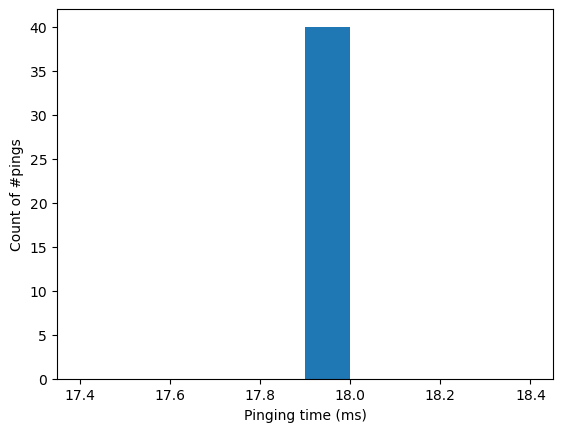

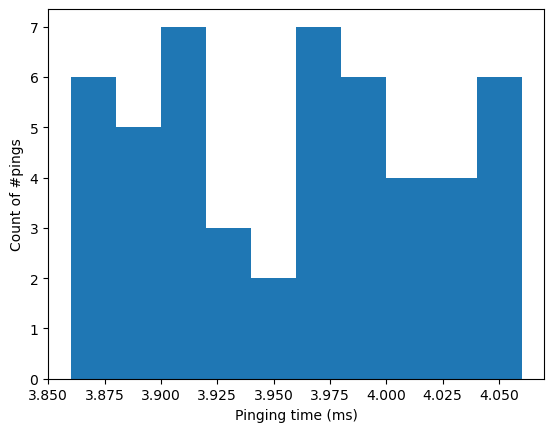

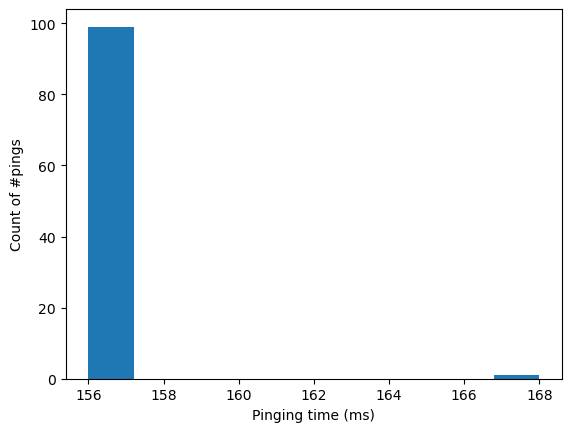

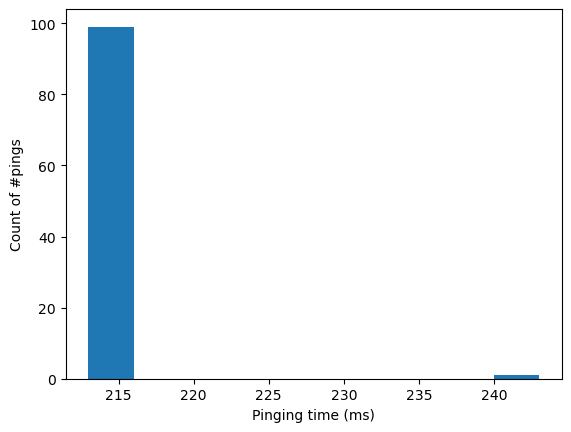

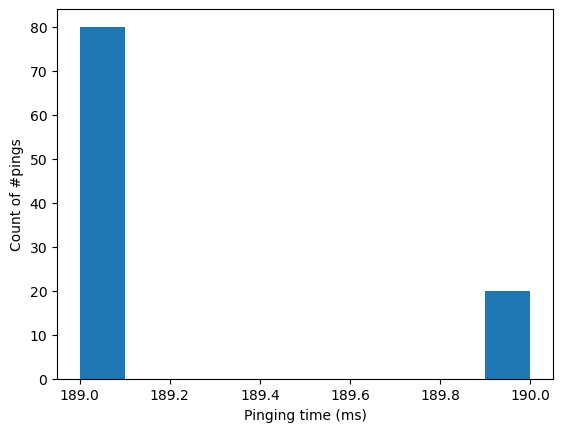

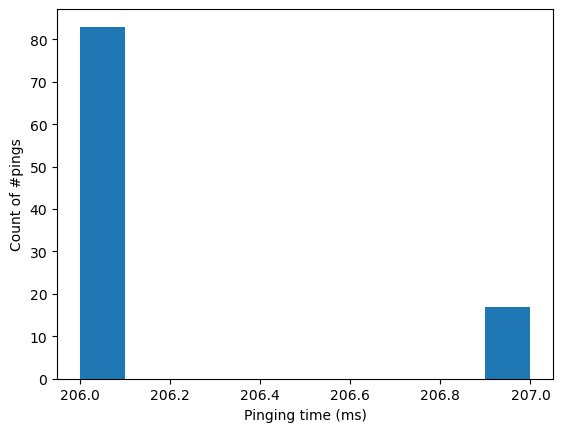

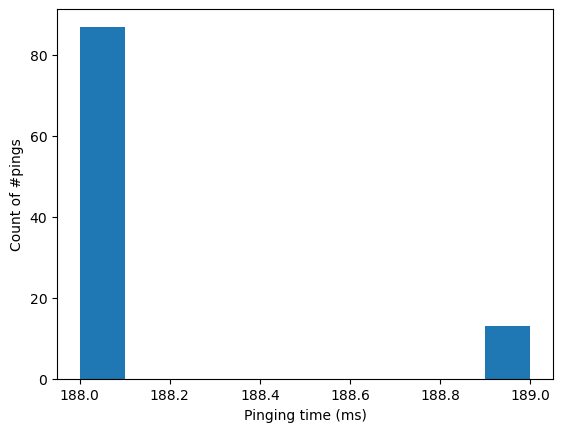

In [997]:
histplot(berkeleyPing)
histplot(harvardPing)
histplot(cernPing)
histplot(sjtuPing)
histplot(tsinghuaPing)
histplot(uqPing)
histplot(usmPing)

##### I'd like to make a note here: the Following histograms look as so because of two things. These data's are composed of one or two debatable outliers, and many of the exact same values (many)

Q: Can you think of reasons why certain ping times might be anomalously long or short?

- For long Pings: Intercontinental network congestion is probably the answer. The intercontinental network is the backbone of the global internet. If there is a lot of traffic on the intercontinental network, it can cause delays in data transmission.
- For short Pings: perhaps the transaction requests where low at that ping, and therefore, the server side computation was fast.
  <br><br>
  Q: If necessary, describe some criteria for ‘cleaning’ your data
- I used a very minimal cleaning, for two outliers at most, which I called inside the hist print function

- I used a very minimal cleaning, for two outliers at most, which I called inside the hist print function


8. Make a table for for the final average time and uncertainty



In [998]:
#call print function for calculated times and uncertainties
printVals()

Standard Deviation of Berkeley Ping:  0.20346989949375788
Standard Deviation of Cern Ping:  1.2213107712617568
Standard Deviation of Sjtu Ping:  2.891643131508449
Standard Deviation of Uq Ping:  0.3756327994198594
Standard Deviation of Harvard Ping:  100.18958791905477
Standard Deviation of Tsinghua Ping:  0.40000000000000013
Standard Deviation of Usm Ping:  0.33630343441600535
----------------------------------------------------------
Mean of Berkeley Ping:  17.880000000000006 ms
Mean of Cern Ping:  156.22 ms
Mean of Sjtu Ping:  214.28 ms
Mean of Uq Ping:  206.17 ms
Mean of Harvard Ping:  14.136899999999994 ms
Mean of Tsinghua Ping:  189.2 ms
Mean of Usm Ping:  188.13 ms
----------------------------------------------------------
Best Estimate of Berkeley Ping:  17.880000000000006 ± δ0.20346989949375788
Best Estimate of Cern Ping:  156.22 ± δ1.2213107712617568
Best Estimate of Sjtu Ping:  214.28 ± δ2.891643131508449
Best Estimate of Uq Ping:  206.17 ± δ0.3756327994198594
Best Estimate 

#### 2.6 Distance Analysis



Determine a estimate fo the distance and an uncertainty on that estimate.

- using traceroute, I got the IP's of all 7 servers. Great! No, using https://www.iplocation.net/ip-lookup, to find coordinates, and https://www.nhc.noaa.gov/gccalc.shtml to find distance between longitudal coordinates, I was able to find the distance.



Here are the following IP's along with the calcuated distances

* www.cern.ch | IP: 188.184.37.219 | Distance: 8217km
* usm.cl | IP: 200.1.18.220| Distance: 10,026 km
* www.berkeley.edu | IP: 141.193.213.20| Distance: 839.9km
* www.uq.edu.au | IP: 130.102.184.3| Distance: 11939km
* www.tsinghua.edu.cn | IP: 166.111.4.100| Distance: 9817km
* sjtu.edu.cn | IP: 202.120.2.119| Distance: 8936km
* www.harvard.edu | IP: 199.232.146.133| Distance: 3103km


The iplocation tool I used which provided longitudal and lattitudal locations, gave me 

In [999]:
#store in array
distances = np.array([839.9,8217,9817,11939,3013,8936,10026])
printDistances = ['Berkeley', 'cern', 'Sjtu', 'Uq', 'Harvard', 'Tsinghua', 'Usm']
def printDist(distance, parrallel):
    i = 0
    for element in distance:
        print(f"Distance from Eugene to {parrallel[i]} is {element}km")
        i+=1
    print("----------------------------------------------------------")
    
        

Thus, the distances

In [1000]:
printDist(distances, printDistances)

Distance from Eugene to Berkeley is 839.9km
Distance from Eugene to cern is 8217.0km
Distance from Eugene to Sjtu is 9817.0km
Distance from Eugene to Uq is 11939.0km
Distance from Eugene to Harvard is 3013.0km
Distance from Eugene to Tsinghua is 8936.0km
Distance from Eugene to Usm is 10026.0km
----------------------------------------------------------


Let's talk about uncertainties of length...


Calculating the exact geographical distance between two points is not easy. Fiber optics are layed across I5 and accross the sea, and that the distance isn't truly the same as the path a plane takes.
<br><br>
Nevertheless, the distances which I've recorded follow a sort of, "as the plane flys," trajectory. Let's consider some of the sources of error in distance.
 * Geographical Path: The actual path taken by network traffic may not be a straight-line distance between the source and destination due to the topology of the internet. The percent uncertainty can be significant and might range from 5% to 20%, depending on routing.
 * Multiple Hops: The ping command measures RTT for each packet to traverse multiple network devices (hops) between the source and destination. Each hop can introduce some uncertainty due to different latencies. The percent uncertainty per hop might be around 1% to 5%. <br>

That being said, and with somewhat no other choice, the estimated percentage of uncertainty based on some of the rational I've provided above, servers oversee's have a larger unceratinty, 15%, and the servers which are not ever seas are 10%.

In [1001]:
distancesUncertainty = np.array([839.9*0.1,8217*0.13,9817*0.15,11939*0.15,3013*0.1,8936*0.13,10026*0.05])

def printDistuncer(distance, parrallel, unc):
    i = 0
    for element in distance:
        print(f"Distance of wire from Eugene to {parrallel[i]} is {element}km ± δ{unc[i]}km")
        i+=1
    print("----------------------------------------------------------")
printDistuncer(distances, printDistances, distancesUncertainty)


Distance of wire from Eugene to Berkeley is 839.9km ± δ83.99000000000001km
Distance of wire from Eugene to cern is 8217.0km ± δ1068.21km
Distance of wire from Eugene to Sjtu is 9817.0km ± δ1472.55km
Distance of wire from Eugene to Uq is 11939.0km ± δ1790.85km
Distance of wire from Eugene to Harvard is 3013.0km ± δ301.3km
Distance of wire from Eugene to Tsinghua is 8936.0km ± δ1161.68km
Distance of wire from Eugene to Usm is 10026.0km ± δ501.3km
----------------------------------------------------------


##### 2.6.1 Distance, Uncertainty, and all other Measurements ("complete your table with distances to go with your ping times")

In [1002]:
printDistuncer(distances, printDistances, distancesUncertainty)
printVals()

Distance of wire from Eugene to Berkeley is 839.9km ± δ83.99000000000001km
Distance of wire from Eugene to cern is 8217.0km ± δ1068.21km
Distance of wire from Eugene to Sjtu is 9817.0km ± δ1472.55km
Distance of wire from Eugene to Uq is 11939.0km ± δ1790.85km
Distance of wire from Eugene to Harvard is 3013.0km ± δ301.3km
Distance of wire from Eugene to Tsinghua is 8936.0km ± δ1161.68km
Distance of wire from Eugene to Usm is 10026.0km ± δ501.3km
----------------------------------------------------------
Standard Deviation of Berkeley Ping:  0.20346989949375788
Standard Deviation of Cern Ping:  1.2213107712617568
Standard Deviation of Sjtu Ping:  2.891643131508449
Standard Deviation of Uq Ping:  0.3756327994198594
Standard Deviation of Harvard Ping:  100.18958791905477
Standard Deviation of Tsinghua Ping:  0.40000000000000013
Standard Deviation of Usm Ping:  0.33630343441600535
----------------------------------------------------------
Mean of Berkeley Ping:  17.880000000000006 ms
Mean o

#### 2.7 Speed of Light

First, do conversions

In [1003]:
#calculation c = d/t

#convert distance to m
# distances = [element * 1000 for element in distances]
# distancesUncertainty = [element * 1000 for element in distancesUncertainty]
for i in range(len(myErrors)):
    myErrors[i] = myErrors[i]*1000

#convert ms to s


##### 2.7.1 Plot Distance vs. time

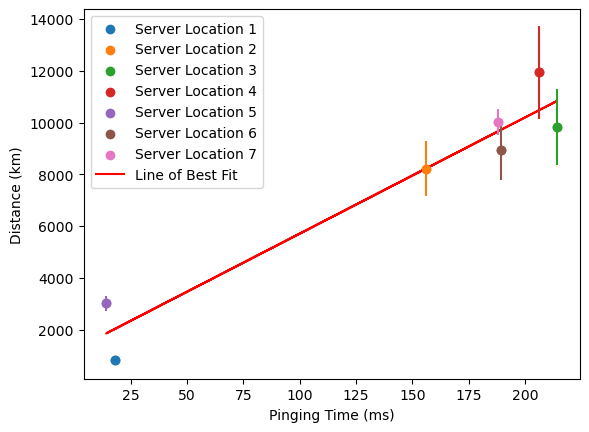

In [1004]:
#Mean Times: myMeans
#Distances: distances
#uncertainties: distancesUncertainty

myUncertainty = distancesUncertainty
# Add labels and a legend
for i in range(len(myMeans)):
    plt.scatter(myMeans[i], distances[i],  label=f"Server Location {i+1}")
slope, intercept = np.polyfit(myMeans, distances, 1)
line_of_best_fit = slope * np.array(myMeans) + intercept
plt.plot(myMeans, line_of_best_fit, label="Line of Best Fit", color='red')
for i in range(len(myMeans)):
    plt.errorbar(myMeans[i], distances[i], yerr=distancesUncertainty[i], fmt='o')

# equation = f"Line of Best Fit: y = {slope:.2f}x + {intercept:.2f}"
# plt.text(1, max(distances) - 50, equation, fontsize=12, color='red')
plt.xlabel("Pinging Time (ms)")
plt.ylabel("Distance (km)")
plt.legend()

# Show the plot
plt.show()


Q: Why might there be a non-zero ping time, even at a distance very close to zero?
* Because we are still dealing with computers, that handle compute

Q: Write down any observations you might have, especially if there are obvious trends in your
data, such as anomalous points, or a different trend for the overseas sites from the US-based
ones.
* There is a linear relationship for sure. As time increases, you ought to believe that your distance increases as well.Server location three, which is in china, was a bit anamoulous. This could be because of the massive step it takes to transmit data over there. Further, server 5, which is at harvard, had super fast ping times. Maybe the east coast has a very direct connection to harvard perhaps

Q: Do all of the data support a linear relationship
between distance and time? If not, can you think of any reasons why?
* They do! A potential reason is that, well, since c is constant in a vacumm, it's change in it's distance scales with a change in it's time will have a linear affect

#### 2.7.2 table of vn with uncertainties

Q:Explain what you have chosen to do in analyzing your data, and calculate a single value
of vn and a total uncertainty for each site you pinged.
* I have chosen to taken means, and consider that the best value, then find uncertainty from the SD.

In [1005]:
#Velocity = distance/time
# print(myMeans)
#Make conversions from Km -> m and ms -> sec
for i in range(len(distances)):
    distances[i] = distances[i]*1000
for i in range(len(distancesUncertainty)):
    distancesUncertainty[i] = distancesUncertainty[i]*1000
for i in range(len(myMeans)):
    myMeans[i] = myMeans[i]/1000 

myVelocity = []
# print(myMeans)
# print(len(distances))

for i in range(len(myMeans)):
    num = distances[i]/myMeans[i]
    myVelocity.append(num)

#Calculate Error Propogation
velocityErrors = []
for i in range(len(myMeans)):
    num =np.sqrt((distancesUncertainty[i]/distances[i])**2+(myErrors[i]/myMeans[i])**2)
    velocityErrors.append(num)

parrellelPrint = ['Berkeley', 'Cern', 'Sjtu', 'Uq', 'Harvard', 'Tsinghua', 'Usm']

for i in range(len(myMeans)):
    print(f"{parrellelPrint[i]} provided a calculation v: {myVelocity[i]} ms^-1 ± δ{velocityErrors[i]} ms^-1")

print("----------------------------------------------------------")

Berkeley provided a calculation v: 46974272.93064875 ms^-1 ± δ11379.748294273706 ms^-1
Cern provided a calculation v: 52598898.98860581 ms^-1 ± δ7817.889972030521 ms^-1
Sjtu provided a calculation v: 45813888.370356545 ms^-1 ± δ13494.694473059017 ms^-1
Uq provided a calculation v: 57908522.093418054 ms^-1 ± δ1821.9566410869345 ms^-1
Harvard provided a calculation v: 213130177.05437553 ms^-1 ± δ7087097.4484543875 ms^-1
Tsinghua provided a calculation v: 47230443.97463003 ms^-1 ± δ2114.16490885943 ms^-1
Usm provided a calculation v: 53292935.735927284 ms^-1 ± δ1787.6119414636505 ms^-1
----------------------------------------------------------


##### And there you are!!! These values are very close to the speed of light!

as a side note, Jupyter messes up these velocity calcutions, unless you Run All. Weird. Nevertheless, these values are of the same magnitude, or off by one, to that of the speed of  light!

#### 2.7.3 Make plot showing V vs. distance

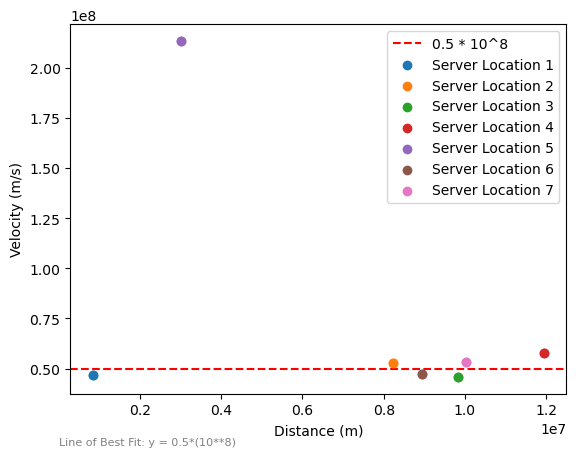

In [1006]:
# Add labels and a legend
y_value = 0.5 * 10**8
plt.axhline(y_value, color='red', linestyle='--', label="0.5 * 10^8")
for i in range(len(distances)):
    plt.scatter(distances[i], myVelocity[i],  label=f"Server Location {i+1}")
slope, intercept = np.polyfit(distances, myVelocity, 1)
line_of_best_fit = slope * np.array(distances) + intercept

for i in range(len(distances)):
    plt.errorbar(distances[i], myVelocity[i], yerr=myErrors[i], fmt='o')

equation = f"Line of Best Fit: y = 0.5*(10**8)"
plt.text(1, max(distances) - 50, equation, fontsize=8, color='gray')
plt.xlabel("Distance (m)")
plt.ylabel("Velocity (m/s)")
plt.legend()

# Show the plot
plt.show()

Note: ERROR ARE PRESENT, BUT NOT LARGE ENOUGH

Q:It is probably worth commenting on whether these
vn values appear to be consistent with each other.
* What the graph represents, truly, is a constant relationship betwen the distance and the velocity. This line is horizontal at about 5*10^8m/s which is one magnitude off from the speed of light. This value, tells us what this experiment has found; the estimated value of velocity in a vacuum. The outlier, and as previously mentioned, is the harvard server which had been unusually fast compared to the others! Well, it is a shock to say that this estimation, found by pinging harvard servers, is almost the EXACT  value as that of the speed of light! Incredible.

Q: make a rough assessment
of the agreement to demonstrate (or refute) the accuracy of your errors.
* It's fair to say that, given the consistency of the results,  and the one outlier demonstrating the true value, that the results are without error in it's calculation. It is ever more impressive that these results are consistent with one another, and that the average estimated velocity is very close to the speed of light. More on why exactly it wasn't found to be the speed of light.

#### 2.7.4 Calculating Weighted Averages

In [1007]:
def weighted_average(values, uncertainties):
    weights = 1 / np.array(uncertainties) ** 2
    weighted_avg = np.sum(values * weights) / np.sum(weights)
    uncertainty_avg = 1 / np.sqrt(np.sum(weights))
    return weighted_avg, uncertainty_avg

parrellelPrint = ['Berkeley', 'Cern', 'Sjtu', 'Uq', 'Harvard', 'Tsinghua', 'Usm']

weightedAvg = weighted_average(myVelocity, velocityErrors)
for i in range(len(myVelocity)):
    print(f"{parrellelPrint[i]} weighted velocity: {weightedAvg}  ")

Berkeley weighted velocity: (53215545.54242849, 1073.6648076000456)  
Cern weighted velocity: (53215545.54242849, 1073.6648076000456)  
Sjtu weighted velocity: (53215545.54242849, 1073.6648076000456)  
Uq weighted velocity: (53215545.54242849, 1073.6648076000456)  
Harvard weighted velocity: (53215545.54242849, 1073.6648076000456)  
Tsinghua weighted velocity: (53215545.54242849, 1073.6648076000456)  
Usm weighted velocity: (53215545.54242849, 1073.6648076000456)  


#### 2.8 Interpretation


Q: How well does your answer agree with the ‘expected’ value? 
* I was shocked when I saw my results, and I'm very happy with the outcome. Every experimentalist enjoy's the satisfaction of a working experiment, this one was able to predict the speed of light very well (within an order of magnitude of 10)

Q: Discuss whether it is
possible that you have underestimated some of the uncertainties you have identified, and in
particular think about whether some of these uncertainties might push the final measured
value in one direction or the other preferentially.
* I think my uncertainty may have been less than what I would assume one would find when working with other computers. In my data, the values which had a longer distance typically were closer to the speed of light. In that case, one might consider the fact that a longer distance, and less time of computation might contribute positivly (in that it subtracts uncertainty), from the final uncertainty. 

Q: Write a paragraph or so discussing these issues, as
well as any additional things that you might chose to do differently if you did this over again.
* Some potential sources of error may have come from the fiber optics. Any kind of fiber optic or light, one of the things that happens is, when you shine light, what happens to the light is it starts off with some intensity, and as it goes through this material, the more you go through this, the more you lose your intensity. The light that travels through glass with itenuate. So waht people do in order to keep the light signal they will add these amipfires, whihc will help maintain the siganl from here to europe to example, it will give you some latency. It slows things down. This is a source of error. Perahps another big contributer of error, which I haven't heard many people discuss, is the computation time. Everythin on computers are done using computation, over some logic, and this computation, while very fast in relation to a single second, damages the transit time of light significantly! Imagine a F1 car of the highest grade pushes his highest velocities on the highway, but then gets stuck behind a Prius. This is what the computation does to our time. This also adds uncertainty. If I were to do this again, I would actually try to account for this computation, finding out exactly what this computational time entails (this is very possible). I truly believe this could be a large contributer to our error; in turn it should be elimated.

-end-